In [1]:
# Loading the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import statsmodels.api as sm

#### 1) Read the data from the CSV file into a DataFrame. (point: 1)

In [2]:
#POS_2020 = pd.read_excel('Data/Fz_Rfg Substitute Meat_POS_2020.xlsx')
#POS_2021 = pd.read_excel('Data/Fz_Rfg Substitute Meat_POS_2021.xlsx')
POS_2022 = pd.read_excel('Data/Fz_Rfg Substitute Meat_POS_2022.xlsx')
POS_2023 = pd.read_excel('Data/Fz_Rfg Substitute Meat_POS_2023.xlsx')
#POS_2024 = pd.read_excel('Data/Fz_Rfg Substitute Meat_POS_2024.xlsx')

In [3]:
product_attr = pd.read_excel('Data/Product Attributes.xlsx')

In [4]:
product_attr.head()

,Product,UPC 13 digit,Aisle Name,Category Name,Sub-Category Name,Manufacturer Name,Brand Franchise Name,Brand Name,Package,Total Count,Total Ounces,Form,Flavor / Scent,Meat Source,Product Type,Type Of Meat Substituted,Type Of Substitute,Cooked Info
0,AL SAFA HALAL FROZEN BEEF HOTDOG 12.6 OZ - 062...,624967436101,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,AL SAFA HALAL,AL SAFA HALAL,AL SAFA HALAL,VACUUM PACKED,8.0,12.6,NaN,REGULAR,BEEF,HOT DOG,NaN,NaN,NaN
1,AL SAFA HALAL FROZEN CHICKEN FRANKFURTER 12 OZ...,624967508101,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,AL SAFA HALAL,AL SAFA HALAL,AL SAFA HALAL,VACUUM PACKED,6.0,12.0,NaN,REGULAR,CHICKEN,FRANKFURTER,NaN,NaN,NaN
2,CLOVERDALE MEATS FROZEN BEEF AND PORK FRANKFUR...,76829017602,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,CLOVERDALE FOODS CO,CLOVERDALE,CLOVERDALE MEATS,BOX,40.0,160.0,NaN,REGULAR,BEEF AND PORK,FRANKFURTER,NaN,NaN,NaN
3,COUNTRY FRESH MEATS FROZEN PORK AND BEEF HOTDO...,829905000521,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,COUNTRY FRESH MEATS INC,COUNTRY FRESH MEATS,COUNTRY FRESH MEATS,VACUUM PACKED,8.0,16.0,NaN,COLBY CHEESE,PORK AND BEEF,HOT DOG,NaN,NaN,NaN
4,NOBRAND FROZEN BEEF HOTDOG 80 OZ - 0694022680771,694022680771,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,FAIR MARKET INC,NOBRAND,NOBRAND,BOX,20.0,80.0,NaN,CHEDDAR JALAPENO,BEEF,HOT DOG,NaN,NaN,NaN


In [5]:
def stack_dfs(dfs):
    # Concatenate the DataFrames along the rows axis
    stacked_df = pd.concat(dfs, ignore_index=True)
    
    # Remove header from all but the first DataFrame
    stacked_df.iloc[1:, :] = stacked_df.iloc[1:, :].values
    
    return stacked_df


#dfs = [POS_2020, POS_2021, POS_2022, POS_2023, POS_2024]
dfs = [POS_2022, POS_2023]
meat_subs = stack_dfs(dfs)

In [6]:
meat_subs.head()

,Geography,Time,Product,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Any Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,...,Incremental Volume,Incremental Dollars,ACV Weighted Distribution,ACV Weighted Distribution No Merch,ACV Weighted Distribution Any Merch,ACV Weighted Distribution Price Reductions Only,ACV Weighted Distribution Feature Only,ACV Weighted Distribution Display Only,ACV Weighted Distribution Special Pack Only,ACV Weighted Distribution Feature and Display
0,Total US - Multi Outlet + Conv,Week Ending 01-09-22,AKUA FROZEN REGULAR MEAT SUBSTITUTE BURGER 6.7...,855146008081,14.518669,6.049445,8.469223,8.469223,NaN,NaN,...,1.525172,17.010071,0.016291,0.009134,0.007156,0.007156,NaN,NaN,NaN,NaN
1,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE BU...,855099007621,38.204586,NaN,38.204586,NaN,38.204586,NaN,...,12.471983,30.740139,0.020600,NaN,0.020600,NaN,0.020600,NaN,NaN,NaN
2,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE CR...,855099007601,1609.867735,437.437495,1172.430240,1022.498005,12.596716,107.601508,...,245.652983,1646.779527,2.063171,0.599740,1.463431,1.336887,0.019672,0.092269,NaN,0.014604
3,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN REGULAR MEAT SUBSTITUTE PATTY 8 O...,855099007341,35.249780,12.652393,22.597388,6.228093,3.473822,2.218710,...,4.233729,22.109091,0.072015,0.033524,0.038491,0.022688,0.007614,0.002942,NaN,0.005247
4,Total US - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN SAUSAGE MEAT SUBSTITUTE CRUMBLE 8...,855099007611,165.356365,114.103418,51.252947,51.252947,NaN,NaN,...,8.843704,55.064636,0.224183,0.152418,0.071766,0.071766,NaN,NaN,NaN,NaN


In [7]:
meat_subs.nunique()

Geography                                               9
Time                                                  104
Product                                              1177
UPC 13 digit                                         1177
Unit Sales                                         448902
Unit Sales No Merch                                438092
Unit Sales Any Merch                               294412
Unit Sales Price Reductions Only                   274984
Unit Sales Feature Only                             50675
Unit Sales Display Only                            107771
Unit Sales Special Pack Only                            0
Unit Sales Feature and Display                      13059
Volume Sales                                       468027
Volume Sales No Merch                              456255
Volume Sales Any Merch                             304914
Volume Sales Price Reductions Only                 284589
Volume Sales Feature Only                           52659
Volume Sales D

In [8]:
# Merging the Produc Attributes and Sales Data-Frames
meat_subs = pd.merge(meat_subs, product_attr, on="UPC 13 digit", how="left")

Code to drop columns with no unique values

In [9]:
def drop_non_unique_columns(meat_subs):
    # Get boolean mask indicating whether each column has only one unique value
    unique_mask = meat_subs.nunique() == 0
    
    # Get list of column names with only one unique value
    non_unique_columns = unique_mask[unique_mask].index.tolist()
    
    # Drop columns with only one unique value
    meat_subs = meat_subs.drop(columns=non_unique_columns)
    
    return meat_subs


# Drop non-unique columns
meat_subs = drop_non_unique_columns(meat_subs)


In [10]:
# meat_subs_US = meat_subs[meat_subs['Geography'] == 'California - Standard - Multi Outlet + Conv']
# meat_subs_US = meat_subs[meat_subs['Geography'] == 'West - Standard - Multi Outlet + Conv']
# meat_subs_US = meat_subs[meat_subs['Geography'] == 'Mid-South - Standard - Multi Outlet + Conv']
# meat_subs_US = meat_subs[meat_subs['Geography'] == 'Southeast - Standard - Multi Outlet + Conv']
# meat_subs_US = meat_subs[meat_subs['Geography'] == 'Great Lakes - Standard - Multi Outlet + Conv']
# meat_subs_US = meat_subs[meat_subs['Geography'] == 'Northeast - Standard - Multi Outlet + Conv']
meat_subs_US = meat_subs[meat_subs['Geography'] == 'South Central - Standard - Multi Outlet + Conv']
# meat_subs_US = meat_subs[meat_subs['Geography'] == 'Plains - Standard - Multi Outlet + Conv']
meat_subs_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42856 entries, 192010 to 464583
Data columns (total 68 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Geography                                        42856 non-null  object 
 1   Time                                             42856 non-null  object 
 2   Product_x                                        42856 non-null  object 
 3   UPC 13 digit                                     42856 non-null  int64  
 4   Unit Sales                                       42856 non-null  float64
 5   Unit Sales No Merch                              41911 non-null  float64
 6   Unit Sales Any Merch                             27405 non-null  float64
 7   Unit Sales Price Reductions Only                 26419 non-null  float64
 8   Unit Sales Feature Only                          2414 non-null   float64
 9   Unit Sales Display Onl

## 1.	What are the top 5 brands of meat substitute products and what are their market shares?

In [11]:
# Calculate total dollar sales for each brand
brand_dollar_sales = meat_subs_US.groupby('Brand Franchise Name')['Dollar Sales'].sum()
brand_dollar_sales

Brand Franchise Name
ABBOTS BUTCHER    158179.593517
ACTUAL VEGGIES      5832.095883
ALPHA             587832.897699
AMYS               53376.254509
BARVECUE               9.462820
                      ...      
VFC                  461.963427
WORTHINGTON          332.294163
YUMMY             264218.330728
YVES                3323.386187
ZEN BURGER          1956.703102
Name: Dollar Sales, Length: 88, dtype: float64

In [12]:
# Calculate total dollar sales for each brand
brand_dollar_sales = meat_subs_US.groupby('Brand Franchise Name')['Dollar Sales'].sum()

# Calculate market share for each brand
total_dollar_sales = brand_dollar_sales.sum()
market_share = (brand_dollar_sales / total_dollar_sales) * 100


# Sort by total dollar sales and get the top 5 brands
top_5_brands = brand_dollar_sales.nlargest(5)

pd.options.display.float_format = '{:.2f}'.format
print("Top 5 brands of meat substitute products and their market shares($):")
top_5_brands

Top 5 brands of meat substitute products and their market shares($):


Brand Franchise Name
MORNINGSTAR FARMS   46532746.14
GARDEIN             29731420.54
IMPOSSIBLE          22005501.13
BEYOND MEAT         14615657.58
LIGHTLIFE            5177598.01
Name: Dollar Sales, dtype: float64

In [13]:
top_brands = pd.DataFrame(top_5_brands)
top_brands['Market Share (%)'] = 100 * top_brands['Dollar Sales']/total_dollar_sales
top_brands

,Dollar Sales,Market Share (%)
Brand Franchise Name,,
MORNINGSTAR FARMS,46532746.14,29.51
GARDEIN,29731420.54,18.86
IMPOSSIBLE,22005501.13,13.96
BEYOND MEAT,14615657.58,9.27
LIGHTLIFE,5177598.01,3.28


## 2.	Combine all UPCs of the other brands (i.e. not the top 5 brands) into one category and call the brand “Other”.

In [14]:
# Calculate total dollar sales for each brand
brand_dollar_sales = meat_subs_US.groupby('Brand Franchise Name')['Dollar Sales'].sum()

# Get the top 7 brands
top_5_brands = brand_dollar_sales.nlargest(5).index

# Create a copy of the DataFrame
meat_subs_modified = meat_subs_US.copy()

# Rename brands that are not in the top 5 as "Other"
meat_subs_modified.loc[~meat_subs_modified['Brand Franchise Name']
                       .isin(top_5_brands), 'Brand Franchise Name'] = 'Other'

meat_subs_modified['Brand Franchise Name'].unique()


array(['Other', 'BEYOND MEAT', 'GARDEIN', 'IMPOSSIBLE',
       'MORNINGSTAR FARMS', 'LIGHTLIFE'], dtype=object)

In [15]:
# Calculate total dollar sales for each brand
salesByBrand = meat_subs_modified.groupby('Brand Franchise Name')['Dollar Sales'].sum()

# Calculate market share for each brand
total_dollar_sales = salesByBrand.sum()
market_share = (brand_dollar_sales / total_dollar_sales) * 100

# Sort by total dollar sales
top_6_brands = salesByBrand.nlargest(6)
top_6_brands

Brand Franchise Name
MORNINGSTAR FARMS   46532746.14
Other               39605516.15
GARDEIN             29731420.54
IMPOSSIBLE          22005501.13
BEYOND MEAT         14615657.58
LIGHTLIFE            5177598.01
Name: Dollar Sales, dtype: float64

In [16]:
top_6_brands = pd.DataFrame(top_6_brands)
top_6_brands['Market Share (%)'] = 100 * top_6_brands['Dollar Sales']/total_dollar_sales
top_6_brands

,Dollar Sales,Market Share (%)
Brand Franchise Name,,
MORNINGSTAR FARMS,46532746.14,29.51
Other,39605516.15,25.12
GARDEIN,29731420.54,18.86
IMPOSSIBLE,22005501.13,13.96
BEYOND MEAT,14615657.58,9.27
LIGHTLIFE,5177598.01,3.28


## 3.	Use latest two year’s data on meat substitute products and create a table of weekly market share for the top 5 brands (e.g., Gardein is a brand) + “Other” brand. For this you should combine all UPCs of say Gardein into one brand. Market share = total brand sales ( dollars )/ total category sales ( dollars ). Do this analysis for all of US only (no need to do this by region). Hint: you may use PROC TABULATE for this.

In [17]:
# Creating a Week column in dataTime dataype for Time variable
meat_subs_modified['Week'] = pd.to_datetime(meat_subs_modified['Time'], format='Week Ending %m-%d-%y')

In [18]:
# Group by week and brand, and calculate total sales (dollars) for each brand for each week
weekly_brand_sales = meat_subs_modified.groupby(['Week', 'Brand Franchise Name'])['Dollar Sales'].sum().unstack(fill_value=0)

# Calculate the total category sales (dollars) for each week
weekly_category_sales = weekly_brand_sales.sum(axis=1)

# Calculate the market share for each brand for each week
weekly_market_share = (weekly_brand_sales.div(weekly_category_sales, axis=0) * 100).round(2)

# Display the table of weekly market share for the top 5 brands plus the "Other" brand
print("Table of Weekly Market Share:")
weekly_market_share


Table of Weekly Market Share:


Brand Franchise Name,BEYOND MEAT,GARDEIN,IMPOSSIBLE,LIGHTLIFE,MORNINGSTAR FARMS,Other
Week,,,,,,
2022-01-09,10.23,18.28,9.70,3.46,29.99,28.33
2022-01-16,10.73,17.93,10.35,3.58,30.06,27.34
2022-01-23,10.43,18.87,10.17,3.62,29.93,26.98
2022-01-30,10.14,18.86,10.39,3.59,29.86,27.16
2022-02-06,10.62,17.18,10.92,3.44,30.30,27.54
...,...,...,...,...,...,...
2023-12-03,9.26,19.93,15.49,1.94,31.56,21.82
2023-12-10,9.53,20.17,15.68,1.88,31.28,21.46
2023-12-17,9.16,20.29,15.80,1.82,31.57,21.36


<AxesSubplot:xlabel='Week'>

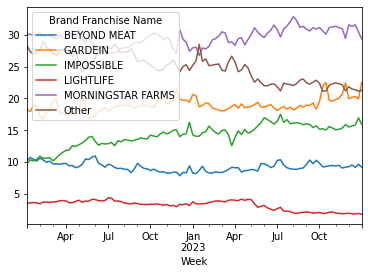

In [19]:
weekly_market_share.reset_index(inplace=True)
weekly_market_share.plot(x='Week',)

<AxesSubplot:xlabel='Week'>

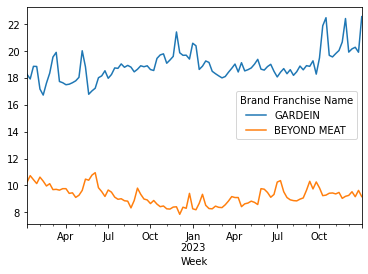

In [20]:
weekly_market_share.reset_index(inplace=True)
weekly_market_share.plot(x='Week', y=['GARDEIN','BEYOND MEAT'])

<AxesSubplot:xlabel='Week'>

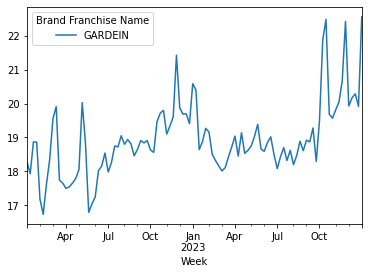

In [21]:
weekly_market_share.plot(x='Week', y=['GARDEIN'])

## 4.	Compute average price (in $) per ounce for each of the 6 brands in each week. Plot the trend in prices and shares by week for Gardein brand only (I need one graph which shows shares and prices). 

In [22]:
# Price per Volume averaged over all UPCs by Brand
weekly_price_per_volume = meat_subs_modified.groupby(['Week', 'Brand Franchise Name'])['Price per Volume'].mean().unstack(fill_value=0)
print('Table: Avg Price per Volume Weekly')
weekly_price_per_volume.reset_index(inplace=True)
weekly_price_per_volume

Table: Avg Price per Volume Weekly


Brand Franchise Name,Week,BEYOND MEAT,GARDEIN,IMPOSSIBLE,LIGHTLIFE,MORNINGSTAR FARMS,Other
0,2022-01-09,8.88,7.25,7.36,8.45,7.21,7.67
1,2022-01-16,8.70,7.21,7.36,8.38,6.74,7.67
2,2022-01-23,8.72,7.37,7.50,8.46,6.94,7.79
3,2022-01-30,8.68,7.49,7.54,8.65,7.05,7.77
4,2022-02-06,8.69,7.64,7.47,8.89,7.16,7.87
...,...,...,...,...,...,...,...
99,2023-12-03,8.63,8.69,8.84,9.29,8.05,8.82
100,2023-12-10,8.72,8.61,8.93,9.77,8.04,8.82
101,2023-12-17,8.99,8.78,8.74,9.76,8.02,8.87
102,2023-12-24,9.20,8.67,8.83,10.30,8.11,9.09


In [23]:
# Price Per Ounce is not used anywhere for analysis, therefore commented out the calculations of Price per ounce

In [24]:
#temp = meat_subs_modified.copy(deep=True)
#temp['Price per Ounce'] = temp['Price per Volume'] / 16

In [25]:
#weekly_price_per_ounce = temp.groupby(['Week', 'Brand Franchise Name'])['Price per Ounce'].mean().unstack(fill_value=0)
#print('Table: Avg Price per Ounce Weekly')
#weekly_price_per_ounce

In [26]:
#weekly_price_per_ounce.reset_index(inplace=True)
#weekly_price_per_ounce.plot(x='Week', y = ['GARDEIN', 'BEYOND MEAT'])

In [27]:
# Average Price per Ounce plot is removed since its not used in subsequent analysis

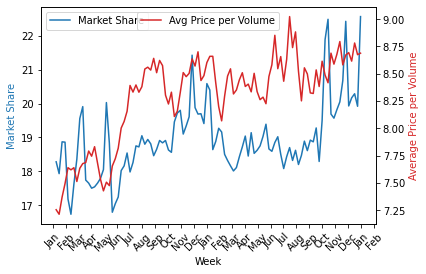

In [28]:
# Create figure and axes objects
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(weekly_market_share['Week'], weekly_market_share['GARDEIN'], color='tab:blue', label='Market Share')
ax1.set_xlabel('Week')
ax1.set_ylabel('Market Share', color='tab:blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second line plot on the secondary y-axis
ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['GARDEIN'], color='tab:red', label='Avg Price per Volume')
ax2.set_ylabel('Average Price per Volume', color='tab:red')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Set the locator and formatter for the x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)

# Show plot
plt.show()

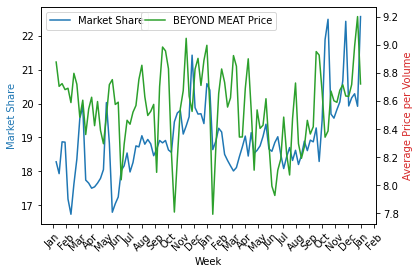

In [29]:
# Market share with average price of other brands

# Create figure and axes objects
fig, ax1 = plt.subplots()

# Plot the first line plot
ax1.plot(weekly_market_share['Week'], weekly_market_share['GARDEIN'], color='tab:blue', label='Market Share')
ax1.set_xlabel('Week')
ax1.set_ylabel('Market Share', color='tab:blue')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second line plot on the secondary y-axis
#ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['GARDEIN'], color='tab:red', label='Avg Price per Volume')
ax2.set_ylabel('Average Price per Volume', color='tab:red')

# Plot the additional brands 'B', 'C', and 'D' on the secondary y-axis
ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['BEYOND MEAT'], color='tab:green', label='BEYOND MEAT Price')
#ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['MORNINGSTAR FARMS'], color='tab:orange', label='MORNINGSTAR FARMS Price')
#ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['IMPOSSIBLE'], color='tab:purple', label='IMPOSSIBLE Price')
#ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['PRIVATE LABEL'], color='tab:purple', label='PRIVATE LABEL Price')
#ax2.plot(weekly_price_per_volume['Week'], weekly_price_per_volume['Other'], color='tab:purple', label='Other Brands Price')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Set the locator and formatter for the x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Rotate x-axis labels for better readability
ax1.tick_params(axis='x', rotation=45)

# Show plot
plt.show()

## 5.	Compute the average price decrease when a brand is on Merchandising (e.g., 5% or 8%).

In [30]:
temp = meat_subs_modified.copy(deep=True)
temp['Merchandising'] = (temp['Price per Volume No Merch'] - temp['Price per Volume Any Merch']) / temp['Price per Volume No Merch']
temp['Merchandising']

192010   0.03
192011   0.08
192012    NaN
192013   0.57
192014   0.33
         ... 
464579   0.40
464580    NaN
464581   0.10
464582    NaN
464583    NaN
Name: Merchandising, Length: 42856, dtype: float64

In [31]:
print('Average Price Decrease per Volume when a brand is on Merchandising (%):')
average_price_decrease = temp.groupby(['Brand Franchise Name'])['Merchandising'].mean()*100
average_price_decrease

Average Price Decrease per Volume when a brand is on Merchandising (%):


Brand Franchise Name
BEYOND MEAT         18.37
GARDEIN             15.08
IMPOSSIBLE          14.46
LIGHTLIFE           22.07
MORNINGSTAR FARMS   13.23
Other               17.26
Name: Merchandising, dtype: float64

In [32]:
print('Overall Mean Price Decrease per Volume on Merchandising')
temp['Merchandising'].mean()*100

Overall Mean Price Decrease per Volume on Merchandising


16.596142073596212

## 6.	Create a dummy variable to indicate a week when there is a merchandising for a brand (here if any UPC of a brand is on promotion (that is it has a significant price reduction), the whole brand is considered to be on promotion and takes the value =1, else it is 0). This will be useful to compare the frequency of merchandising across brands. Create a table that looks like the following table.

# Trying to find the ideal variables for regression:

In [33]:
# Creating a dummy for Feature (a brand is on Feature)

# weekly_promo = temp.groupby(['Brand Franchise Name', 'Week'])['Merchandising'].transform(lambda x: int((x > 0.2).any())).rename('Whether on Promo')
# weekly_promo = weekly_promo.groupby([temp['Brand Franchise Name'], temp['Week']]).mean().reset_index()
# weekly_promo

In [34]:
# weekly_promo['Whether on Promo'].sum()

In [35]:
# Group by week and brand, and calculate total sales (dollars) for each brand for each week
weekly_brand_sales = meat_subs_modified.groupby(['Brand Franchise Name', 'Week'])['Dollar Sales'].sum()
weekly_market_share = weekly_brand_sales.reset_index()
weekly_market_share

,Brand Franchise Name,Week,Dollar Sales
0,BEYOND MEAT,2022-01-09,197114.65
1,BEYOND MEAT,2022-01-16,223529.27
2,BEYOND MEAT,2022-01-23,206158.62
3,BEYOND MEAT,2022-01-30,190720.50
4,BEYOND MEAT,2022-02-06,206558.28
...,...,...,...
619,Other,2023-12-03,260259.44
620,Other,2023-12-10,259502.64
621,Other,2023-12-17,253778.14
622,Other,2023-12-24,263963.16


In [36]:
weekly_price_per_volume = meat_subs_modified.groupby(['Brand Franchise Name', 'Week'])['Price per Volume'].agg(Average_Price='mean').reset_index()

# Appropriate Naming
weekly_price_per_volume.rename(columns={'Average_Price': 'Average Price'}, inplace=True)

weekly_price_per_volume

,Brand Franchise Name,Week,Average Price
0,BEYOND MEAT,2022-01-09,8.88
1,BEYOND MEAT,2022-01-16,8.70
2,BEYOND MEAT,2022-01-23,8.72
3,BEYOND MEAT,2022-01-30,8.68
4,BEYOND MEAT,2022-02-06,8.69
...,...,...,...
619,Other,2023-12-03,8.82
620,Other,2023-12-10,8.82
621,Other,2023-12-17,8.87
622,Other,2023-12-24,9.09


In [37]:
# Merchandising - Price Reduction, Feature, Display
temp['Price_Reduction'] = (temp['Price per Volume No Merch'] - temp['Price per Volume Price Reductions Only']) / temp['Price per Volume No Merch']
temp['Feature'] = (temp['Price per Volume No Merch'] - temp['Price per Volume Feature Only']) / temp['Price per Volume No Merch']
temp['Display'] = (temp['Price per Volume No Merch'] - temp['Price per Volume Display Only']) / temp['Price per Volume No Merch']
temp['Feature_and_Display'] = (temp['Price per Volume No Merch'] - temp['Price per Volume Feature and Display']) / temp['Price per Volume No Merch']

temp[['Price_Reduction','Feature','Display','Feature_and_Display']].mean()


Price_Reduction       0.18
Feature               0.06
Display               0.04
Feature_and_Display   0.05
dtype: float64

In [38]:
temp.groupby(['Brand Franchise Name'])[['Price_Reduction','Feature','Display','Feature_and_Display','Merchandising']].mean()*100

,Price_Reduction,Feature,Display,Feature_and_Display,Merchandising
Brand Franchise Name,,,,,
BEYOND MEAT,19.16,10.42,7.42,4.93,18.37
GARDEIN,16.83,5.44,4.07,5.85,15.08
IMPOSSIBLE,15.55,5.19,0.14,9.09,14.46
LIGHTLIFE,22.39,9.36,-0.46,NaN,22.07
MORNINGSTAR FARMS,14.21,6.17,4.88,1.83,13.23
Other,18.55,7.96,3.52,18.07,17.26


In [39]:
weekly_merch = temp.groupby(['Brand Franchise Name', 'Week'])[['Price_Reduction','Feature','Display','Feature_and_Display']].mean()*100
weekly_merch = weekly_merch.reset_index()

weekly_merch

,Brand Franchise Name,Week,Price_Reduction,Feature,Display,Feature_and_Display
0,BEYOND MEAT,2022-01-09,15.41,10.94,4.98,NaN
1,BEYOND MEAT,2022-01-16,11.57,-0.78,5.06,NaN
2,BEYOND MEAT,2022-01-23,9.33,3.78,4.87,NaN
3,BEYOND MEAT,2022-01-30,9.62,-1.62,-0.12,NaN
4,BEYOND MEAT,2022-02-06,15.14,24.06,2.89,NaN
...,...,...,...,...,...,...
619,Other,2023-12-03,15.92,1.00,5.93,4.65
620,Other,2023-12-10,13.29,NaN,9.09,NaN
621,Other,2023-12-17,19.07,NaN,12.99,NaN
622,Other,2023-12-24,17.26,NaN,5.15,NaN


In [40]:
weekly_merch.isnull().sum()

Brand Franchise Name      0
Week                      0
Price_Reduction           0
Feature                 308
Display                  17
Feature_and_Display     552
dtype: int64

In [41]:
weekly_merch = weekly_merch.fillna(0)
weekly_merch.isnull().sum()

Brand Franchise Name    0
Week                    0
Price_Reduction         0
Feature                 0
Display                 0
Feature_and_Display     0
dtype: int64

In [42]:
# Merge the DataFrames
df = pd.merge(weekly_market_share, weekly_price_per_volume, on=['Brand Franchise Name', 'Week'], how='left')
df = pd.merge(df, weekly_merch, on=['Brand Franchise Name', 'Week'], how='left')
df

,Brand Franchise Name,Week,Dollar Sales,Average Price,Price_Reduction,Feature,Display,Feature_and_Display
0,BEYOND MEAT,2022-01-09,197114.65,8.88,15.41,10.94,4.98,0.00
1,BEYOND MEAT,2022-01-16,223529.27,8.70,11.57,-0.78,5.06,0.00
2,BEYOND MEAT,2022-01-23,206158.62,8.72,9.33,3.78,4.87,0.00
3,BEYOND MEAT,2022-01-30,190720.50,8.68,9.62,-1.62,-0.12,0.00
4,BEYOND MEAT,2022-02-06,206558.28,8.69,15.14,24.06,2.89,0.00
...,...,...,...,...,...,...,...,...
619,Other,2023-12-03,260259.44,8.82,15.92,1.00,5.93,4.65
620,Other,2023-12-10,259502.64,8.82,13.29,0.00,9.09,0.00
621,Other,2023-12-17,253778.14,8.87,19.07,0.00,12.99,0.00
622,Other,2023-12-24,263963.16,9.09,17.26,0.00,5.15,0.00


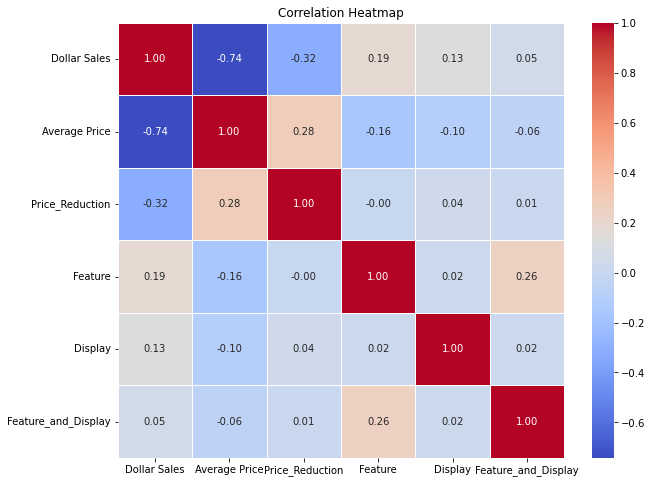

In [43]:
# Checking for correlations between varaibles:
correlation_matrix = df.corr()

# Plotting the heat-map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 7.	Run a OLS regression model (for each of 6 brands) to predict Market share using the above variables or any other variables that you think can be included in the model. Write a careful report on your findings. Calculate price elasticity for Gardein brand.

In [44]:
# Iterate over unique brands
for brand in df['Brand Franchise Name'].unique():
    print(f"Regression results for Brand {brand}:")
    
    # Filter data for the current brand
    brand_data = df[df['Brand Franchise Name'] == brand]
    
    # Fit regression model
    X = sm.add_constant(brand_data.drop(columns=['Week','Dollar Sales', 'Brand Franchise Name','Feature_and_Display']))
    y = brand_data['Dollar Sales']
    model = sm.OLS(y, X).fit()
    
    # Print regression results
    print(model.summary())
    print("\n")

Regression results for Brand BEYOND MEAT:
                            OLS Regression Results                            
Dep. Variable:           Dollar Sales   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     3.380
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0123
Time:                        18:00:21   Log-Likelihood:                -1196.1
No. Observations:                 104   AIC:                             2402.
Df Residuals:                      99   BIC:                             2415.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------


In [45]:
temp2 = df.copy(deep=True)
temp2.head()

,Brand Franchise Name,Week,Dollar Sales,Average Price,Price_Reduction,Feature,Display,Feature_and_Display
0,BEYOND MEAT,2022-01-09,197114.65,8.88,15.41,10.94,4.98,0.00
1,BEYOND MEAT,2022-01-16,223529.27,8.70,11.57,-0.78,5.06,0.00
2,BEYOND MEAT,2022-01-23,206158.62,8.72,9.33,3.78,4.87,0.00
3,BEYOND MEAT,2022-01-30,190720.50,8.68,9.62,-1.62,-0.12,0.00
4,BEYOND MEAT,2022-02-06,206558.28,8.69,15.14,24.06,2.89,0.00


In [46]:
temp2 = pd.get_dummies(temp2, columns=['Brand Franchise Name'],drop_first=True)
temp2.head()

,Week,Dollar Sales,Average Price,Price_Reduction,Feature,Display,Feature_and_Display,Brand Franchise Name_GARDEIN,Brand Franchise Name_IMPOSSIBLE,Brand Franchise Name_LIGHTLIFE,Brand Franchise Name_MORNINGSTAR FARMS,Brand Franchise Name_Other
0,2022-01-09,197114.65,8.88,15.41,10.94,4.98,0.00,0,0,0,0,0
1,2022-01-16,223529.27,8.70,11.57,-0.78,5.06,0.00,0,0,0,0,0
2,2022-01-23,206158.62,8.72,9.33,3.78,4.87,0.00,0,0,0,0,0
3,2022-01-30,190720.50,8.68,9.62,-1.62,-0.12,0.00,0,0,0,0,0
4,2022-02-06,206558.28,8.69,15.14,24.06,2.89,0.00,0,0,0,0,0


In [47]:
# Regression on Dummies for Brand, along with other variables

# Fit regression model
X = sm.add_constant(temp2.drop(columns=['Week','Dollar Sales']))
y = temp2['Dollar Sales']
model = sm.OLS(y, X).fit()
    
# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Dollar Sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     710.4
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:00:22   Log-Likelihood:                -7504.4
No. Observations:                 624   AIC:                         1.503e+04
Df Residuals:                     613   BIC:                         1.508e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [48]:
gardein = df[df['Brand Franchise Name'] == 'GARDEIN'].copy(deep=True).reset_index()
gardein = gardein.drop(columns='index')
gardein.head()

,Brand Franchise Name,Week,Dollar Sales,Average Price,Price_Reduction,Feature,Display,Feature_and_Display
0,GARDEIN,2022-01-09,352333.42,7.25,11.55,-1.18,17.52,0.00
1,GARDEIN,2022-01-16,373481.39,7.21,12.24,9.44,14.48,0.00
2,GARDEIN,2022-01-23,373099.92,7.37,11.43,17.97,18.69,0.00
3,GARDEIN,2022-01-30,354673.82,7.49,16.02,13.64,19.80,0.00
4,GARDEIN,2022-02-06,333947.56,7.64,13.79,0.00,22.43,0.00


In [49]:
# Iterate over unique brands
for brand in df['Brand Franchise Name'].unique():
    if brand != 'GARDEIN':
        
         # Filter data for the current brand
        brand_data = df[df['Brand Franchise Name'] == brand].copy(deep=True)

        # Reset index to ensure correct indexing
        brand_data.reset_index(drop=True, inplace=True)
        
        # Copy the 'Average Price' column for the current brand to the 'gardein' DataFrame
        gardein[f'{brand} Avg Price'] = brand_data['Average Price'].copy(deep=True)
        gardein[f'{brand} Price_Reduction'] = brand_data['Price_Reduction'].copy(deep=True)
        gardein[f'{brand} Feature'] = brand_data['Feature'].copy(deep=True)
        gardein[f'{brand} Display'] = brand_data['Display'].copy(deep=True)
        #gardein[f'{brand} Feature_and_Display'] = brand_data['Feature_and_Display'].copy(deep=True)

gardein.head()

,Brand Franchise Name,Week,Dollar Sales,Average Price,Price_Reduction,Feature,Display,Feature_and_Display,BEYOND MEAT Avg Price,BEYOND MEAT Price_Reduction,...,LIGHTLIFE Feature,LIGHTLIFE Display,MORNINGSTAR FARMS Avg Price,MORNINGSTAR FARMS Price_Reduction,MORNINGSTAR FARMS Feature,MORNINGSTAR FARMS Display,Other Avg Price,Other Price_Reduction,Other Feature,Other Display
0,GARDEIN,2022-01-09,352333.42,7.25,11.55,-1.18,17.52,0.00,8.88,15.41,...,6.79,1.26,7.21,9.13,-21.37,2.27,7.67,17.57,3.53,4.94
1,GARDEIN,2022-01-16,373481.39,7.21,12.24,9.44,14.48,0.00,8.70,11.57,...,6.32,0.67,6.74,14.93,7.51,4.34,7.67,16.89,9.18,8.71
2,GARDEIN,2022-01-23,373099.92,7.37,11.43,17.97,18.69,0.00,8.72,9.33,...,14.29,6.03,6.94,10.73,-2.05,5.13,7.79,20.58,10.37,9.05
3,GARDEIN,2022-01-30,354673.82,7.49,16.02,13.64,19.80,0.00,8.68,9.62,...,10.18,-27.24,7.05,13.09,-7.06,5.45,7.77,18.60,14.66,10.47
4,GARDEIN,2022-02-06,333947.56,7.64,13.79,0.00,22.43,0.00,8.69,15.14,...,0.00,1.30,7.16,11.73,0.00,1.52,7.87,19.00,9.25,9.94


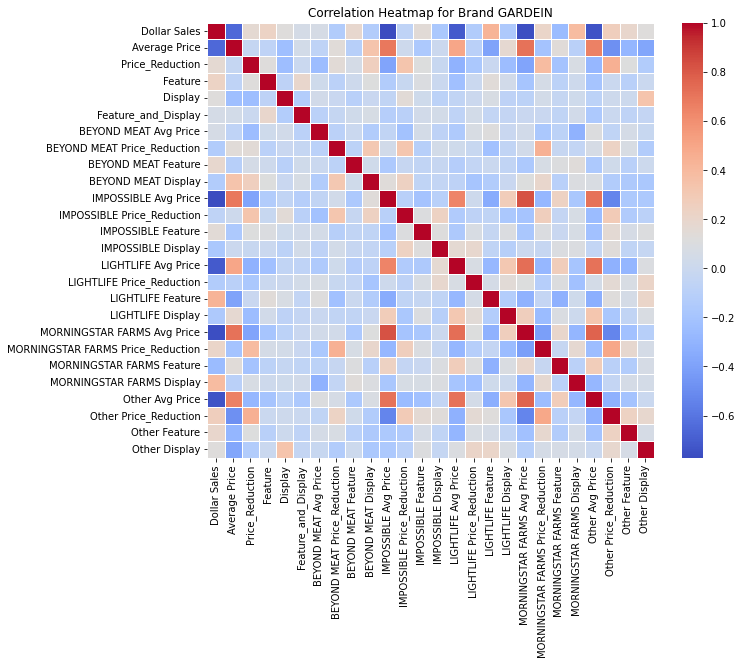

In [50]:
# Checking for correlations between varaibles:
correlation_matrix = gardein.corr()

# Plotting the heat-map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for Brand GARDEIN')
plt.show()

In [51]:
## For Tomorrow:
# average prices of other brands in the model
# or avg price reductions?
# feature and display interaction (feature and price_reduction and display interaction?)

In [52]:
correlation_matrix

,Dollar Sales,Average Price,Price_Reduction,Feature,Display,Feature_and_Display,BEYOND MEAT Avg Price,BEYOND MEAT Price_Reduction,BEYOND MEAT Feature,BEYOND MEAT Display,...,LIGHTLIFE Feature,LIGHTLIFE Display,MORNINGSTAR FARMS Avg Price,MORNINGSTAR FARMS Price_Reduction,MORNINGSTAR FARMS Feature,MORNINGSTAR FARMS Display,Other Avg Price,Other Price_Reduction,Other Feature,Other Display
Dollar Sales,1.00,-0.65,0.16,0.23,0.12,0.06,0.06,-0.14,0.19,-0.14,...,0.43,-0.16,-0.76,0.21,-0.26,0.39,-0.74,0.27,0.19,0.12
Average Price,-0.65,1.00,-0.03,-0.07,-0.24,0.04,-0.07,0.14,-0.11,0.34,...,-0.40,0.17,0.71,-0.20,0.14,-0.09,0.66,-0.48,-0.29,-0.38
Price_Reduction,0.16,-0.03,1.00,0.12,-0.24,-0.01,-0.25,0.14,0.06,0.26,...,-0.01,-0.25,-0.38,0.39,-0.21,0.08,-0.28,0.45,0.11,-0.14
Feature,0.23,-0.07,0.12,1.00,-0.08,0.20,0.02,-0.09,0.02,0.11,...,0.14,0.03,-0.19,0.06,-0.08,0.01,-0.20,-0.01,-0.10,-0.01
Display,0.12,-0.24,-0.24,-0.08,1.00,-0.13,0.04,-0.02,-0.10,-0.02,...,0.08,-0.07,-0.09,0.04,-0.03,0.02,-0.08,0.02,0.01,0.34
Feature_and_Display,0.06,0.04,-0.01,0.20,-0.13,1.00,-0.09,-0.03,0.03,0.07,...,-0.05,-0.04,-0.02,-0.01,-0.06,0.03,-0.16,-0.01,-0.07,-0.04
BEYOND MEAT Avg Price,0.06,-0.07,-0.25,0.02,0.04,-0.09,1.00,-0.09,-0.01,-0.14,...,0.12,-0.02,0.04,-0.18,-0.08,-0.31,0.10,-0.06,0.05,-0.02
BEYOND MEAT Price_Reduction,-0.14,0.14,0.14,-0.09,-0.02,-0.03,-0.09,1.00,-0.08,0.31,...,-0.22,-0.05,0.03,0.45,-0.02,-0.05,0.06,0.23,0.08,-0.14
BEYOND MEAT Feature,0.19,-0.11,0.06,0.02,-0.10,0.03,-0.01,-0.08,1.00,0.03,...,-0.01,-0.05,-0.17,0.07,0.11,0.13,-0.17,0.03,-0.10,0.01
BEYOND MEAT Display,-0.14,0.34,0.26,0.11,-0.02,0.07,-0.14,0.31,0.03,1.00,...,-0.14,-0.01,0.11,0.20,-0.10,0.09,0.09,-0.14,-0.16,-0.17


In [53]:
# Fit regression model
predictors_to_include = ['Average Price', 'Price_Reduction', 'Feature','Display','Feature_and_Display','BEYOND MEAT Avg Price']
X = sm.add_constant(gardein[predictors_to_include])
                
                
# Adding lagged term
#X['Display_Lagged'] = X['Display'].shift(1)
#X['Feature_Lagged'] = X['Feature'].shift(1)
#X = X.iloc[1:]
#X['time'] = range(1, len(gardein) + 1)  #time trend
# Lagged terms and time trends are no use (creating correlations)

# y = gardein['Dollar Sales']
# Taking the logarithm of Dollar Sales
y = np.log(gardein['Dollar Sales'])
model = sm.OLS(y, X).fit()
    
# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Dollar Sales   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     14.90
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           5.23e-12
Time:                        18:00:23   Log-Likelihood:                 108.82
No. Observations:                 104   AIC:                            -203.6
Df Residuals:                      97   BIC:                            -185.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    13.76

In [54]:
gardein.to_csv('gardein.csv', index=False)

In [55]:
# Compute first differences for all variables
X_diff = X.diff().dropna()
y_diff = y.diff().dropna()

model_diff = sm.OLS(y_diff, X_diff).fit()

# Print regression results
print(model_diff.summary())

#First Differences is not working

                                 OLS Regression Results                                
Dep. Variable:           Dollar Sales   R-squared (uncentered):                   0.098
Model:                            OLS   Adj. R-squared (uncentered):              0.042
Method:                 Least Squares   F-statistic:                              1.758
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                       0.116
Time:                        18:00:23   Log-Likelihood:                          158.99
No. Observations:                 103   AIC:                                     -306.0
Df Residuals:                      97   BIC:                                     -290.2
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

c:\Workspace\python\lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [56]:
# No of UPCs on Price_Reduction per week per brand
price_reduction_freq = temp.groupby(['Brand Franchise Name', 'Week'])['Price per Volume Price Reductions Only'].transform(lambda x: int((x > 0).sum())).rename('No of UPCs on Price_Reduction')
price_reduction_freq = price_reduction_freq.groupby([temp['Brand Franchise Name'], temp['Week']]).mean().reset_index()
price_reduction_freq

,Brand Franchise Name,Week,No of UPCs on Price_Reduction
0,BEYOND MEAT,2022-01-09,14.00
1,BEYOND MEAT,2022-01-16,14.00
2,BEYOND MEAT,2022-01-23,13.00
3,BEYOND MEAT,2022-01-30,14.00
4,BEYOND MEAT,2022-02-06,14.00
...,...,...,...
619,Other,2023-12-03,104.00
620,Other,2023-12-10,104.00
621,Other,2023-12-17,105.00
622,Other,2023-12-24,87.00


In [57]:
# No of UPCs on Feature per week per brand
feature_freq = temp.groupby(['Brand Franchise Name', 'Week'])['Price per Volume Feature Only'].transform(lambda x: int((x > 0).sum())).rename('No of UPCs on Feature')
feature_freq = feature_freq.groupby([temp['Brand Franchise Name'], temp['Week']]).mean().reset_index()
feature_freq

,Brand Franchise Name,Week,No of UPCs on Feature
0,BEYOND MEAT,2022-01-09,5.00
1,BEYOND MEAT,2022-01-16,3.00
2,BEYOND MEAT,2022-01-23,4.00
3,BEYOND MEAT,2022-01-30,2.00
4,BEYOND MEAT,2022-02-06,1.00
...,...,...,...
619,Other,2023-12-03,8.00
620,Other,2023-12-10,0.00
621,Other,2023-12-17,0.00
622,Other,2023-12-24,0.00


In [58]:
# No of UPCs on Display per week per brand
display_freq = temp.groupby(['Brand Franchise Name', 'Week'])['Price per Volume Display Only'].transform(lambda x: int((x > 0).sum())).rename('No of UPCs on Display')
display_freq = display_freq.groupby([temp['Brand Franchise Name'], temp['Week']]).mean().reset_index()
display_freq

,Brand Franchise Name,Week,No of UPCs on Display
0,BEYOND MEAT,2022-01-09,8.00
1,BEYOND MEAT,2022-01-16,7.00
2,BEYOND MEAT,2022-01-23,8.00
3,BEYOND MEAT,2022-01-30,9.00
4,BEYOND MEAT,2022-02-06,10.00
...,...,...,...
619,Other,2023-12-03,14.00
620,Other,2023-12-10,20.00
621,Other,2023-12-17,11.00
622,Other,2023-12-24,12.00


In [59]:
# No of UPCs on both Display as well as Feature per week per brand
display_feature_freq = temp.groupby(['Brand Franchise Name', 'Week'])['Price per Volume Feature and Display'].transform(lambda x: int((x > 0).sum())).rename('No of UPCs on both Feature and Display')
display_feature_freq = display_feature_freq.groupby([temp['Brand Franchise Name'], temp['Week']]).mean().reset_index()
display_feature_freq

,Brand Franchise Name,Week,No of UPCs on both Feature and Display
0,BEYOND MEAT,2022-01-09,0.00
1,BEYOND MEAT,2022-01-16,0.00
2,BEYOND MEAT,2022-01-23,0.00
3,BEYOND MEAT,2022-01-30,0.00
4,BEYOND MEAT,2022-02-06,0.00
...,...,...,...
619,Other,2023-12-03,2.00
620,Other,2023-12-10,0.00
621,Other,2023-12-17,0.00
622,Other,2023-12-24,0.00


In [60]:
# Merge the DataFrames
df2 = pd.merge(df, price_reduction_freq, on=['Brand Franchise Name', 'Week'], how='left')
df2 = pd.merge(df2, feature_freq, on=['Brand Franchise Name', 'Week'], how='left')
df2 = pd.merge(df2, display_freq, on=['Brand Franchise Name', 'Week'], how='left')
df2 = pd.merge(df2, display_feature_freq, on=['Brand Franchise Name', 'Week'], how='left')
df2

,Brand Franchise Name,Week,Dollar Sales,Average Price,Price_Reduction,Feature,Display,Feature_and_Display,No of UPCs on Price_Reduction,No of UPCs on Feature,No of UPCs on Display,No of UPCs on both Feature and Display
0,BEYOND MEAT,2022-01-09,197114.65,8.88,15.41,10.94,4.98,0.00,14.00,5.00,8.00,0.00
1,BEYOND MEAT,2022-01-16,223529.27,8.70,11.57,-0.78,5.06,0.00,14.00,3.00,7.00,0.00
2,BEYOND MEAT,2022-01-23,206158.62,8.72,9.33,3.78,4.87,0.00,13.00,4.00,8.00,0.00
3,BEYOND MEAT,2022-01-30,190720.50,8.68,9.62,-1.62,-0.12,0.00,14.00,2.00,9.00,0.00
4,BEYOND MEAT,2022-02-06,206558.28,8.69,15.14,24.06,2.89,0.00,14.00,1.00,10.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
619,Other,2023-12-03,260259.44,8.82,15.92,1.00,5.93,4.65,104.00,8.00,14.00,2.00
620,Other,2023-12-10,259502.64,8.82,13.29,0.00,9.09,0.00,104.00,0.00,20.00,0.00
621,Other,2023-12-17,253778.14,8.87,19.07,0.00,12.99,0.00,105.00,0.00,11.00,0.00
622,Other,2023-12-24,263963.16,9.09,17.26,0.00,5.15,0.00,87.00,0.00,12.00,0.00


In [61]:
df2.groupby(['Brand Franchise Name'])\
    [['No of UPCs on Price_Reduction','No of UPCs on Feature','No of UPCs on Display',\
      'No of UPCs on both Feature and Display']].mean()

,No of UPCs on Price_Reduction,No of UPCs on Feature,No of UPCs on Display,No of UPCs on both Feature and Display
Brand Franchise Name,,,,
BEYOND MEAT,14.76,1.06,6.01,0.12
GARDEIN,27.59,3.07,12.09,0.26
IMPOSSIBLE,17.55,1.78,9.26,0.16
LIGHTLIFE,14.19,0.10,2.34,0.00
MORNINGSTAR FARMS,34.67,12.50,14.22,0.89
Other,145.27,4.71,25.94,0.37


In [62]:
# Iterate over unique brands
for brand in df2['Brand Franchise Name'].unique():
    print(f"Regression results for Brand {brand}:")
    
    # Filter data for the current brand
    brand_data = df2[df2['Brand Franchise Name'] == brand]
    
    # Fit regression model
    X = sm.add_constant(brand_data.drop(columns=['Week','Dollar Sales', 'Brand Franchise Name','Feature_and_Display']))
    y = brand_data['Dollar Sales']
    model = sm.OLS(y, X).fit()
    
    # Print regression results
    print(model.summary())
    print("\n")

Regression results for Brand BEYOND MEAT:
                            OLS Regression Results                            
Dep. Variable:           Dollar Sales   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     14.21
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           2.02e-13
Time:                        18:00:24   Log-Likelihood:                -1161.9
No. Observations:                 104   AIC:                             2342.
Df Residuals:                      95   BIC:                             2366.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

c:\Workspace\python\lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [63]:
# Running a Regression without the no of UPCs on promotion (using only dummies)
brand_data = df2[df2['Brand Franchise Name'] == 'GARDEIN']

# Fit regression model
X = sm.add_constant(brand_data.drop(columns=['Week','Dollar Sales', 'Brand Franchise Name',\
    'No of UPCs on Price_Reduction','No of UPCs on Feature', 'No of UPCs on Display','No of UPCs on both Feature and Display']))
y = brand_data['Dollar Sales']
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())
print("\n")

                            OLS Regression Results                            
Dep. Variable:           Dollar Sales   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     18.04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.20e-12
Time:                        18:00:24   Log-Likelihood:                -1198.5
No. Observations:                 104   AIC:                             2409.
Df Residuals:                      98   BIC:                             2425.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.092e+05   5

In [64]:
# Running a Regression without the no of UPCs on promotion (using only dummies)
brand_data = df2[df2['Brand Franchise Name'] == 'GARDEIN']

# Fit regression model
X = sm.add_constant(brand_data.drop(columns=['Week','Dollar Sales', 'Brand Franchise Name',\
    'No of UPCs on Price_Reduction','No of UPCs on Feature', 'No of UPCs on Display','No of UPCs on both Feature and Display']))
y = brand_data['Dollar Sales']
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())
print("\n")

                            OLS Regression Results                            
Dep. Variable:           Dollar Sales   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     18.04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.20e-12
Time:                        18:00:24   Log-Likelihood:                -1198.5
No. Observations:                 104   AIC:                             2409.
Df Residuals:                      98   BIC:                             2425.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.092e+05   5

In [65]:
## TO DO:

# 2: Since we have seen Beyond Meat as a strong competition, 
# only its price and 'No of upcs on promo' of that brand can used for regression 
# multi-collinearity problems -- NEED RESOLUTION

# 3: include the previous years data to get the initial graphs

# 4: use geography variable

# 5: How to use other attributes: 
# packaging, ACV weighted distribution, 

# 6: important products (UPCs) for the brand: reviews

# can display have lagged effects? 
# we check by taking only 1 or 2 popular products to see the effect



In [66]:
# Descriptive anallytics:
# 1. how many UPCS per brand?
# 2. how much $sales is notionally lost (can be gained) by gardein for the lack of products which other brands have
# Can having fewer no of UPCs on merchandising have an impact on Market Share? bcoz Beyond Meat has fewer nos

# 3. beyond meat more discounts but fewer products on discount

In [67]:
temp.head()

,Geography,Time,Product_x,UPC 13 digit,Unit Sales,Unit Sales No Merch,Unit Sales Any Merch,Unit Sales Price Reductions Only,Unit Sales Feature Only,Unit Sales Display Only,...,Product Type,Type Of Meat Substituted,Type Of Substitute,Cooked Info,Week,Merchandising,Price_Reduction,Feature,Display,Feature_and_Display
192010,South Central - Standard - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN ORIGINAL BEEFY MEAT SUBSTITUTE CR...,855099007601,379.47,24.89,354.57,246.97,NaN,107.60,...,MEAT SUBSTITUTE,BEEF,PLANT BASED,COOK THOROUGHLY,2022-01-09,0.03,0.03,NaN,0.03,NaN
192011,South Central - Standard - Multi Outlet + Conv,Week Ending 01-09-22,ALPHA FROZEN SAUSAGE MEAT SUBSTITUTE CRUMBLE 8...,855099007611,13.05,5.44,7.61,7.61,NaN,NaN,...,MEAT SUBSTITUTE,SAUSAGE,PLANT BASED,COOK THOROUGHLY,2022-01-09,0.08,0.08,NaN,NaN,NaN
192012,South Central - Standard - Multi Outlet + Conv,Week Ending 01-09-22,AMYS FROZEN CALIFORNIA VEGGIE MEAT SUBSTITUTE ...,42272000103,118.75,118.75,NaN,NaN,NaN,NaN,...,MEAT SUBSTITUTE,VALUE NOT AVAILABLE,VEGETABLES AND GRAINS,VALUE NOT AVAILABLE,2022-01-09,NaN,NaN,NaN,NaN,NaN
192013,South Central - Standard - Multi Outlet + Conv,Week Ending 01-09-22,AMYS SONOMA FROZEN SONOMA MEAT SUBSTITUTE BURG...,42272003731,34.57,31.31,3.26,3.26,NaN,NaN,...,MEAT SUBSTITUTE,VALUE NOT AVAILABLE,VEGGIE QUINOA AND WALNUTS,VALUE NOT AVAILABLE,2022-01-09,0.57,0.57,NaN,NaN,NaN
192014,South Central - Standard - Multi Outlet + Conv,Week Ending 01-09-22,WORTHINGTON FROZEN REGULAR MEAT SUBSTITUTE SLI...,858156006561,14.10,11.84,2.26,2.26,NaN,NaN,...,MEAT SUBSTITUTE,HAM,PLANT POWERED,VALUE NOT AVAILABLE,2022-01-09,0.33,0.33,NaN,NaN,NaN


In [68]:
temp[temp['Brand Franchise Name'].isin(['BEYOND MEAT', 'GARDEIN', 'IMPOSSIBLE', 'MORNINGSTAR FARMS'])]\
    .groupby(['Type Of Meat Substituted', 'Brand Franchise Name'])['Type Of Substitute'].value_counts()

Type Of Meat Substituted  Brand Franchise Name  Type Of Substitute                       
BEEF                      BEYOND MEAT           PLANT BASED                                  441
                          GARDEIN               PLANT BASED                                  352
                                                GARDEN GROWN PROTEIN                         102
                          IMPOSSIBLE            MADE FROM PLANTS                              64
                                                PLANT BASED                                   44
                          MORNINGSTAR FARMS     VEGGIE                                       526
                                                PLANT PROTEIN                                152
                                                PLANT PROTEIN WITH DAIRY FREE CHEESE          81
                                                VEGGIE WITH BLACK BEAN                        56
                                     

In [69]:
a = temp[temp['Brand Franchise Name'].isin(['BEYOND MEAT', 'GARDEIN', 'IMPOSSIBLE', 'MORNINGSTAR FARMS'])]\
    .groupby(['Package', 'Brand Franchise Name'])['Form'].value_counts()

In [70]:
a[30:70]

Package                           Brand Franchise Name  Form           
PLASTIC BAG                       IMPOSSIBLE            NUGGET              96
                                                        MEATBALL            64
                                  MORNINGSTAR FARMS     BURGER              59
                                                        CRUMBLE              3
PLASTIC CONTAINER                 BEYOND MEAT           MEATBALL           104
                                  IMPOSSIBLE            PATTY              104
PLASTIC CONTAINER IN SLEEVE       BEYOND MEAT           BURGER PATTY       139
                                                        LINK               104
                                  IMPOSSIBLE            LINK               188
                                  MORNINGSTAR FARMS     GROUND              84
                                                        BRATWURST           45
PLASTIC TRAY IN CARDBOARD SLEEVE  BEYOND MEAT           MEA

In [71]:
temp[temp['Brand Franchise Name'].isin(['BEYOND MEAT', 'GARDEIN', 'IMPOSSIBLE'])]\
    .groupby(['Form', 'Brand Franchise Name','Package'])['UPC 13 digit'].count()

Form             Brand Franchise Name  Package               
BALL             IMPOSSIBLE            RESEALABLE PLASTIC BAG    104
BITE             GARDEIN               RESEALABLE PLASTIC BAG    104
BREAKFAST PATTY  BEYOND MEAT           BOX                       208
                 GARDEIN               BOX                        24
                                       RESEALABLE PLASTIC BAG    114
                                                                ... 
TENDER           GARDEIN               RESEALABLE PLASTIC BAG    208
                 IMPOSSIBLE            RESEALABLE PLASTIC BAG     41
TIP              GARDEIN               RESEALABLE PLASTIC BAG    104
WING             GARDEIN               PLASTIC BAG               101
                                       RESEALABLE PLASTIC BAG    246
Name: UPC 13 digit, Length: 61, dtype: int64

In [72]:
temp.columns

Index(['Geography', 'Time', 'Product_x', 'UPC 13 digit', 'Unit Sales',
       'Unit Sales No Merch', 'Unit Sales Any Merch',
       'Unit Sales Price Reductions Only', 'Unit Sales Feature Only',
       'Unit Sales Display Only', 'Unit Sales Feature and Display',
       'Volume Sales', 'Volume Sales No Merch', 'Volume Sales Any Merch',
       'Volume Sales Price Reductions Only', 'Volume Sales Feature Only',
       'Volume Sales Display Only', 'Volume Sales Feature and Display',
       'Dollar Sales', 'Dollar Sales No Merch', 'Dollar Sales Any Merch',
       'Dollar Sales Price Reductions Only', 'Dollar Sales Feature Only',
       'Dollar Sales Display Only', 'Dollar Sales Feature and Display',
       'Price per Unit', 'Price per Unit No Merch', 'Price per Unit Any Merch',
       'Price per Unit Price Reductions Only', 'Price per Unit Feature Only',
       'Price per Unit Display Only', 'Price per Unit Feature and Display',
       'Price per Volume', 'Price per Volume No Merch',
       

In [73]:
temp.groupby(['Brand Franchise Name'])['Package'].apply(lambda x: x.mode().iloc[0])

Brand Franchise Name
BEYOND MEAT          RESEALABLE PLASTIC BAG
GARDEIN              RESEALABLE PLASTIC BAG
IMPOSSIBLE           RESEALABLE PLASTIC BAG
LIGHTLIFE                               BOX
MORNINGSTAR FARMS    RESEALABLE PLASTIC BAG
Other                                   BOX
Name: Package, dtype: object

In [74]:
temp[temp['Brand Franchise Name'] == 'GARDEIN'].Package.unique()

array(['RESEALABLE PLASTIC BAG', 'PLASTIC BAG', 'BOX'], dtype=object)

In [75]:
temp.groupby(['Package'])['Dollar Sales'].max(5)

Package
BAG IN BOX                                      80.89
BOX                                          43437.21
CARDBOARD BOX & WINDOW                        5043.44
INDIVIDUAL POUCH IN RESEALABLE PLASTIC BAG    1603.97
INDIVIDUALLY WRAPPED IN BOX                  35862.76
MICROWAVEABLE SAFE STAND UP POUCH             4933.39
PLASTIC BAG                                  55975.76
PLASTIC BAG IN BOX                            1513.09
PLASTIC CONTAINER                            28015.86
PLASTIC CONTAINER IN SLEEVE                  42762.11
PLASTIC PEG BAG                               4140.81
PLASTIC TRAY IN CARDBOARD SLEEVE              4447.47
PLASTIC TRAY IN SLEEVE                         157.07
PLASTIC WRAP IN BOX                             43.16
PLASTIC WRAP TRAY                            16303.56
PLASTIC WRAPPED                              15873.14
PLASTIC WRAPPED IN CARDBOARD SLEEVE          18444.42
RESEALABLE PLASTIC BAG                       79168.82
RESEALABLE PLASTIC P